In [2]:
pip install geopandas

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
  Obtaining dependency information for geopandas from https://files.pythonhosted.org/packages/c4/64/7d344cfcef5efddf9cf32f59af7f855828e9d74b5f862eddf5bfd9f25323/geopandas-1.0.1-py3-none-any.whl.metadata
  Obtaining dependency information for pyogrio>=0.7.2 from https://files.pythonhosted.org/packages/25/19/6a24c2052f2f99190482c83dcf8ecdc02bde9c8dbc2d604f088f9bbb5dbb/pyogrio-0.11.0-cp311-cp311-manylinux_2_28_x86_64.whl.metadata
  Obtaining dependency information for pyproj>=3.3.0 from https://files.pythonhosted.org/packages/3c/ac/12fab74a908d40b63174dc704587febd0729414804bbfd873cabe504ff2d/pyproj-3.7.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for shapely>=2.0.0 from https://files.pythonhosted.org/packages/92/07/3e2738c542d73182066196b8ce99388cb537d19e300e428d50b1537e3b21/shapely-2.1.0-cp311-cp311-manylinux_2_1

In [5]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd           # For data handling
import matplotlib.pyplot as plt  # For static plots
import seaborn as sns         # For statistical visualizations
import plotly.express as px   # For interactive plots
import geopandas as gpd

In [23]:
try:
    df = pd.read_csv("./seattle-weather.csv")
    print(df.head())
except Exception as e:
    print("Error loading dataset:", e) 
    

         date  precipitation  temp_max  temp_min  wind  weather
0  2012-01-01            0.0      12.8       5.0   4.7  drizzle
1  2012-01-02           10.9      10.6       2.8   4.5     rain
2  2012-01-03            0.8      11.7       7.2   2.3     rain
3  2012-01-04           20.3      12.2       5.6   4.7     rain
4  2012-01-05            1.3       8.9       2.8   6.1     rain


In [41]:
df.columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
 6   year           1461 non-null   int32         
dtypes: datetime64[ns](1), float64(4), int32(1), object(1)
memory usage: 74.3+ KB


In [24]:
#Check for missing values
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [33]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

In [50]:
df.describe()

# Group
weather_counts = df_filtered.groupby(['year', 'weather']).size().unstack(fill_value=0)

In [46]:
condition = ['rain', 'drizzle']
df_filtered = df[df['weather'].isin(condition)].copy()
num_cols = df_filtered.select_dtypes(include='number').columns
df_filtered[num_cols] = df_filtered[num_cols].fillna(0)

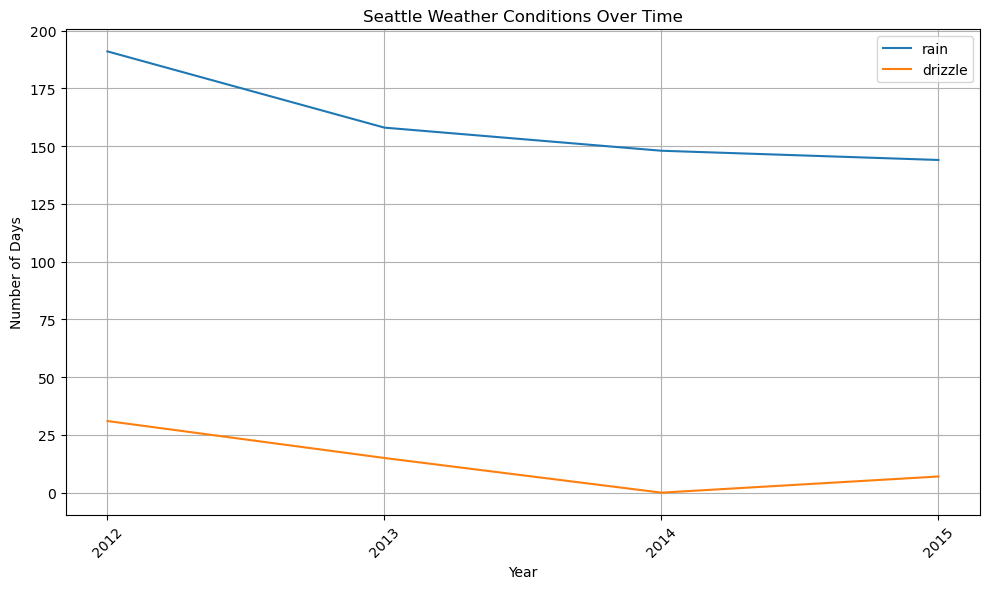

In [51]:
# line chart
plt.figure(figsize=(10, 6))
for weather in condition:
    plt.plot(weather_counts.index, weather_counts[weather], label=weather)
plt.title('Seattle Weather Conditions Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Days')
plt.grid(True)
plt.xticks(weather_counts.index, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [67]:
colors = ['skyblue' if i % 2 == 0 else 'yellow' for i in range(len(weather_counts))]

<Figure size 1000x600 with 0 Axes>

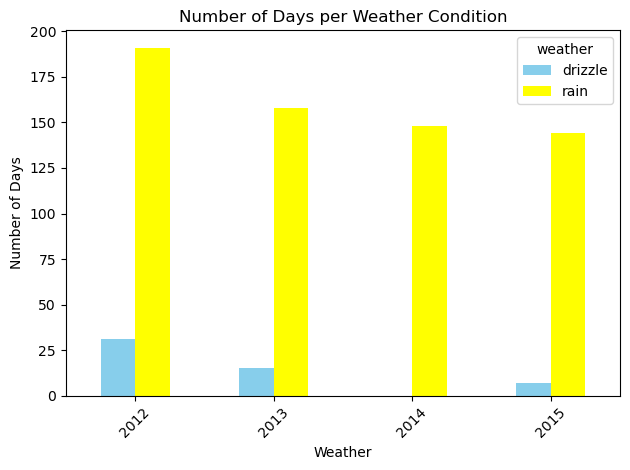

In [68]:
# bar chart
plt.figure(figsize=(10, 6))
weather_counts.plot(kind='bar', color=colors)
plt.title('Number of Days per Weather Condition')
plt.xlabel('Weather')
plt.ylabel('Number of Days')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

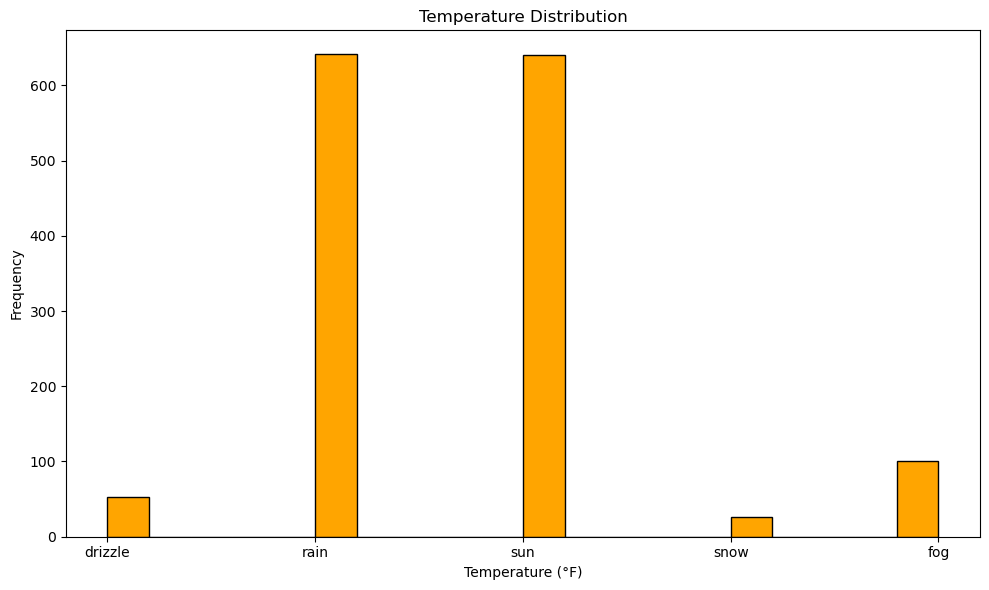

In [58]:
# histogram
plt.figure(figsize=(10, 6))
plt.hist(df['weather'], bins=20, color='orange', edgecolor='black')
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

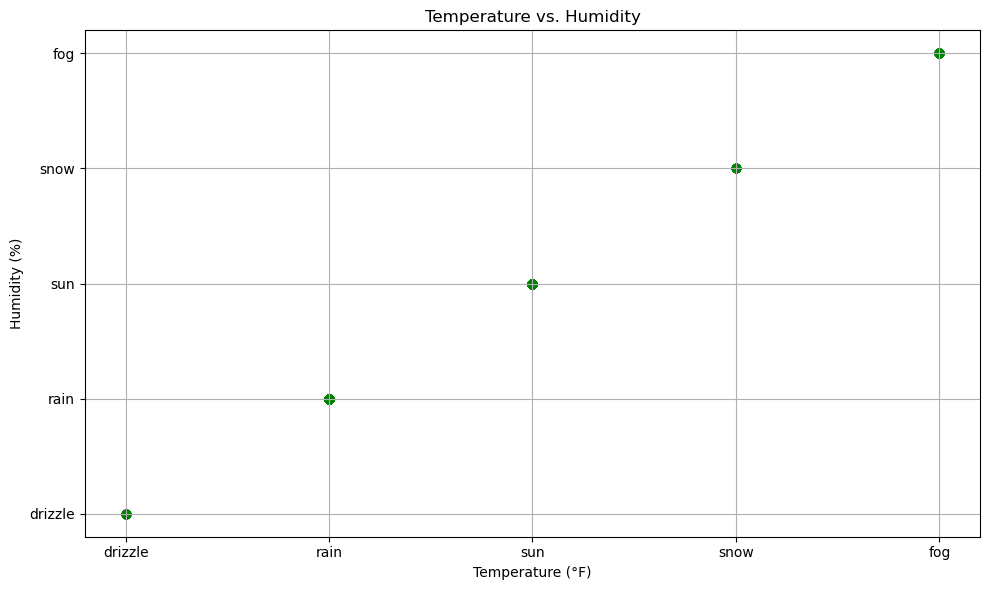

In [62]:
# scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['weather'], df['weather'], alpha=0.5, color='green')
plt.title('Temperature vs. Humidity')
plt.xlabel('Temperature (°F)')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.tight_layout()
plt.show()